In [1]:
!pip install inflection

In [2]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=05bdea4c35d2fd35ec1a0bc09d8fddaf96a7aba4ca286017a4b03de8f839e0c0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00


In [4]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=97ab6638395ea12bda99cc0b6d25011803b214ee26e5349b1f2def0eaf5d4764
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [5]:
!pip install python-dateutil

In [59]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.5 MB/s eta 0:00:00


## i. O DESAFIO

*   De posse de um dataset contendo informações sobre diversos modelos de carros com seus respectivos preços de venda, tomou-se a decisão de aplicar um modelo de machine learning capaz de realizar a **previsão** de preço de novas entradas na base de dados.

*   After collecting data from their clients database during the period of 1 year, the company's marketing team is analyzing wheter it would be profitable or not to separate it into distinct groups, in order to distinguish those who represent a larger ammount of the company's earnings.

*   De posse da solução, times de negócio podem simular com maior clareza quais os fatores que mais influenciam no preço de venda, tomando vantagem nos negócios a partir de soluções adotadas a partir de dados (Data Driven)

## ii. QUESTÕES DE NEGÓCIO

*   Ao término da aplicação do modelo, é esperado um relatório contendo respostas e curso de ação para as seguintes perguntas:

    1.  Quais as características(features) que mais influenciam a alteração do preço do veículo ?
    
    2.  Quais as premissas tomadas ao longo do processo de tratamento, análise de dados e feature engineering?

    3.  Qual a performance do modelo aplicado e como expressar-los à times de negócio?

    4.  Como colocar o modelo em produção?
    
    5.  Quais são possíveis rotas para a melhoria contínua do modelo?



# 0.0 IMPORTS, FUNÇÕES E DATA LOAD

## 0.1 Imports

In [60]:
import pandas       as pd
import numpy        as np
import seaborn      as sns
import math
import ipywidgets
import inflection
import warnings
import os

from matplotlib         import pyplot as plt
from collections        import Counter
from ydata_profiling    import ProfileReport
from pandasql           import sqldf
from dateutil           import parser as date_parser
from boruta             import BorutaPy

from sklearn.preprocessing      import MinMaxScaler, StandardScaler
from sklearn.dummy              import DummyClassifier
from sklearn.ensemble           import RandomForestRegressor, ExtraTreesClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.model_selection    import train_test_split, StratifiedKFold, KFold
from sklearn.metrics            import log_loss

from imblearn.ensemble          import BalancedRandomForestClassifier
from imblearn.pipeline          import Pipeline
from imblearn.combine           import SMOTEENN
from imblearn.under_sampling    import EditedNearestNeighbours

from IPython.core.display import HTML
from IPython.display      import Image

## 0.2 Funções Auxiliares

In [7]:
warnings.filterwarnings ('ignore')

def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

In [8]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.3 Database load

In [9]:
df0 = pd.read_csv('datasets/car_prices.csv')
df0.sample(5)

year     make     model        trim   body transmission                vin state  condition  odometer   color interior                         seller      mmr  sellingprice                                 saledate
203     2013  Hyundai  Santa Fe  Sport 2.0T    SUV    automatic  5xyzwdla8dg094937    ca        5.0   10747.0   black    black   hyundai motor america/co car  19850.0       25800.0  Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
213140  2007    Honda      CR-V        EX-L    SUV    automatic  jhlre48777c061343    in       37.0   91859.0  silver    black             santander consumer  10650.0       11100.0  Thu Jan 29 2015 02:10:00 GMT-0800 (PST)
446290  2012     Ford    Escape     Limited    SUV    automatic  1fmcu0e7xckc41138    tn       39.0   39601.0       —    black  ford motor credit company llc  15650.0       17000.0  Wed May 27 2015 03:00:00 GMT-0700 (PDT)
386635  2007    Mazda    Mazda6   s Touring  Sedan    automatic  1yvhp80d175m01628    md       19.0   87579.0    gray    black       sheehy nissan of waldorf   5300.0        5000.0  Tue Mar 10 2015 02:30:00 GMT-0700 (PDT)
495544  1997      NaN       NaN         NaN    NaN    automatic  1ftcr14x1vpb14863    ca       19.0  168243.0    blue    beige                pacific porsche   1300.0        1100.0  Wed Jun 03 2015 05:30:00 GMT-0700 (PDT)

In [10]:
#df0 = pd.read_csv('/home/valquiriaam/repos/case_dasa/datasets/car_prices.csv')
#df0.sample(5)

In [11]:
print(f'Number of Rows: {df0.shape[0]}')
print(f'Number of Columns: {df0.shape[1]}')

Number of Rows: 558837
Number of Columns: 16


# 1.0 DESCRIÇÃO DOS DADOS

In [12]:
df1 = df0.copy()

In [13]:
df1.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [14]:
cols_old = [ 'year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new
df1.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [15]:
#Reordenando Colunas
cols = ['vin', 'year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'saledate',
       'mmr', 'sellingprice']

df1 = df1[cols]
df1.sample()

vin  year  make   model   trim      body transmission state  condition  odometer color interior         seller                                 saledate     mmr  sellingprice
492886  1ftyr14e59pa25050  2009  Ford  Ranger  SPORT  supercab    automatic    pr       33.0   97521.0   red    black  oriental bank  Thu Jun 04 2015 06:00:00 GMT-0700 (PDT)  8225.0        8000.0

## 1.1 Overview Geral

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           558833 non-null  object 
 1   year          558837 non-null  int64  
 2   make          548536 non-null  object 
 3   model         548438 non-null  object 
 4   trim          548186 non-null  object 
 5   body          545642 non-null  object 
 6   transmission  493485 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  saledate      558825 non-null  object 
 14  mmr           558799 non-null  float64
 15  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [17]:
df1_profile = ProfileReport(df1, title='Profile Report')
df1_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*   vin: Código de identificação de veículo

*   year: Ano de Fabricação do Veículo

*   make: Montadora Fabricante do Veículo

*   model: Modelo do Veículo

*   trim: Versão de acabamento do véiculo

*   body: Categoria de carroceria do veículo

*   transmission: Tipo de Transmissão

*   state: Estado onde o veículo foi fabricado

*   condition: Pontuação que expressa a condição do veículo (Valores de 0 a 50)

*   odometer: Medição do Hodômetro indicado pelo veículo(Distância Percorrida)

*   color: Cor do Véiculo

*   interior: Acabamento Interno

*   seller: Vendedor/Revendedora

*   saledate: Data de venda

*   mmr: (Manheim Market Report) - Valor de venda estimada para o veículo, estabelecido pela rede de casas de leilão Manheim, presente em todos os Estados dos EUA.

*   sellingprice: Preço Vendido

## 1.2 Tratamento de Dados Faltantes/Inconsistentes

### 1.2.1 Coluna 'vin' (Reorganização do dataset)

In [18]:
#Coluna vin

df1[df1['vin'] == 'automatic'].sample(5)

vin  year        make  model                    trim         body transmission              state  condition  odometer  color interior seller saledate  mmr  sellingprice
417835  automatic  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation        Sedan  3vwd17aj2fm258506        NaN       1.0   9410    white   gray    10500  NaN       13300.0
427040  automatic  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation        Sedan  3vwd17aj0fm227318        NaN      41.0  14872     gray  black    14300  NaN       13700.0
421289  automatic  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation        Sedan  3vwd17aj3fm276741        NaN      46.0   1167     blue  black    12700  NaN       13200.0
499083  automatic  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation        sedan  3vwd17aj5fm268964        NaN       2.0   9887      red  black     9900  NaN       13900.0
548784  automatic  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation        sedan  3vwd17aj7fm326640        NaN       2.0   2846     blue  black     7500  NaN       13600.0

In [19]:
df1['body'] = df1.apply(lambda x: 'sedan' if x['vin'] == 'automatic' else
                                             x['body'], axis=1)

df1['transmission'] = df1.apply(lambda x: 'automatic' if x['vin'] == 'automatic' else
                                                         x['transmission'], axis=1)

df1['condition'] = df1.apply(lambda x: x['odometer'] if x['vin'] == 'automatic' else
                                                        x['condition'], axis=1)

df1['odometer'] = df1.apply(lambda x: x['color'] if x['vin'] == 'automatic' else
                                                    x['odometer'], axis=1)

df1['color'] = df1.apply(lambda x: x['interior'] if x['vin'] == 'automatic' else
                                                    x['color'], axis=1)

df1['interior'] = df1.apply(lambda x: x['seller'] if x['vin'] == 'automatic' else
                                                     x['interior'], axis=1)

df1['seller'] = df1.apply(lambda x: '-' if x['vin'] == 'automatic' else
                                           x['seller'], axis=1)

df1['mmr'] = df1.apply(lambda x: x['saledate'] if x['vin'] == 'automatic' else
                                                  x['mmr'], axis=1)

df1['saledate'] =  df1.apply(lambda x: 'Tue Dec 16 2014 12:30:00 GMT-0800 (PST)' if x['vin'] == 'automatic' else
                                                                                    x['saledate'], axis=1)

df1['vin'] =  df1.apply(lambda x: x['state'] if x['vin'] == 'automatic' else
                                                x['vin'], axis=1)

df1['state'] =  df1.apply(lambda x: 'ca' if x['vin'] == x['state'] else
                                            x['state'], axis=1)


In [20]:
df1 = df1.dropna(subset=['vin'])


In [21]:
df1[df1['vin'] == '3vwd17aj4fm201708'].sample()

vin  year        make  model                    trim   body transmission state  condition odometer   color interior seller                                 saledate    mmr  sellingprice
408161  3vwd17aj4fm201708  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  sedan    automatic    ca       46.0     4802  silver     gray      -  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  16500       13200.0

### 1.2.2 Preenchimento dos dados faltantes nas demais colunas

## Observações e premissas adotadas para cada coluna:

*   vin: A Coluna com o indicador de código de identificação do veículo 'vin', apresentava inconsistência para valores observados como 'automatic' no pandas profiling: Tais entradas foram corrigidas, assumindo transmissão como 'automática' e Estado de produção do veículo como 'ca' (Preenchimento por voto de maioria). Valores faltantes (NaN) tiveram suas linhas removidas.

*   make: Entradas com a coluna 'make' faltante (NaN), também apresentaram dados faltantes para demais características do carro (model, body, trim), sendo descartadas pela impossibilidade de ganho de informação

*   model: Entradas faltantes para 'model' foram observados para modelos que não fazem distinção de modelo/acabamento. Valores 'NaN' foram preenchidos com o nome do modelo, colocados inicialmente na coluna 'trim'.

*   trim: Modelos que não tem distinção de acabamento tiveram valores ausentes preenchidos com '-'

*   body: Modelos sem especificação de carroceria foram preenchidos com valor '-'.

*   transmission: Valores faltantes preenchidos como 'automatic', por voto de maioria absoluta no dataset.

*   condition: Os dados faltantes foram preenchidos com o score equivalente a mediana da base de dados encontradas pelo pandas profiling, que é o valor de 31.

*   odometer: Os dados faltantes foram preenchidos com o valor médio de distância percorrida das entradas presentes no dataset, que é o valor de 68320 milhas.

*   color: Dados Faltantes preenchidos com '-'.

*   interior: Dados faltantes preenchidos com '-'.

*   saledate: Linhas com valores faltantes removidas

*   mmr: Linhas com valores faltantes removidas

*   sellingprice:Linhas com valores faltantes removidas

## NOTA: Por observação no pandas profiling e  preenchimento do dado de cada coluna, não foram observados outliers ou dados anormais nas distribuições de cada coluna.

In [22]:
df1 = df1.dropna(subset=['make'])

In [23]:
df1['model'] = df1.apply(lambda x: x['trim'] if pd.isna(x['model']) else
                                                x['model'], axis=1)

df1['trim'] = df1.apply(lambda x: '-' if pd.isna(x['trim']) else
                                         x['trim'], axis=1)

df1['body'] = df1.apply(lambda x: '-' if pd.isna(x['body']) else
                                         x['body'], axis=1)

df1['transmission'] = df1.apply(lambda x: 'automatic' if pd.isna(x['transmission']) else
                                                         x['transmission'], axis=1)

df1['condition'] = df1.apply(lambda x: 31 if pd.isna(x['condition']) else
                                             x['condition'], axis=1)

df1['odometer'] = df1.apply(lambda x: 68320 if pd.isna(x['odometer']) else
                                               x['odometer'], axis=1)

df1['color'] = df1.apply(lambda x: '-' if pd.isna(x['color']) else
                                          x['color'], axis=1)

df1['interior'] = df1.apply(lambda x: '-' if pd.isna(x['interior']) else
                                          x['interior'], axis=1)

In [24]:
df1.drop

df1 = df1.dropna(subset=['saledate', 'mmr', 'sellingprice'])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548520 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           548520 non-null  object 
 1   year          548520 non-null  int64  
 2   make          548520 non-null  object 
 3   model         548520 non-null  object 
 4   trim          548520 non-null  object 
 5   body          548520 non-null  object 
 6   transmission  548520 non-null  object 
 7   state         548520 non-null  object 
 8   condition     548520 non-null  float64
 9   odometer      548520 non-null  object 
 10  color         548520 non-null  object 
 11  interior      548520 non-null  object 
 12  seller        548520 non-null  object 
 13  saledate      548520 non-null  object 
 14  mmr           548520 non-null  object 
 15  sellingprice  548520 non-null  float64
dtypes: float64(2), int64(1), object(13)
memory usage: 71.1+ MB


## 1.3 Tipificação dos Dados e Tratamento dos Valores de Data (Coluna 'saledate')

*   A tipagem das colunas 'condition', 'odometer' e 'mmr' serão alteradas para valores numéricos

*   A coluna 'salesdate' (que contém a data de venda do veículo), será desmembrada de forma a permitir maior precisão nas análises envolvendo datas.

In [26]:
df1['condition'] = df1['condition'].astype(np.int64)

df1['odometer'] = df1['odometer']. astype(np.int64)

df1['mmr'] = df1['mmr']. astype(np.float64)

In [27]:
df1['day_of_week'] = df1['saledate'].apply(lambda x: date_parser.parse(x).strftime('%a'))

#'saledate' conversion to datetime
df1['saledate'] = df1['saledate'].apply(lambda x: date_parser.parse(x).strftime('%Y-%m-%d'))
df1['saledate'] = pd.to_datetime(df1['saledate'])

#year_sold
df1['year_sold'] = df1['saledate'].dt.year.astype(np.int64)

#month_sold
df1['month_sold'] = df1['saledate'].dt.month.astype(np.int64)

#day_sold
df1['day_sold'] = df1['saledate'].dt.day.astype(np.int64)

In [28]:
df1.columns

Index(['vin', 'year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'saledate',
       'mmr', 'sellingprice', 'day_of_week', 'year_sold', 'month_sold',
       'day_sold'],
      dtype='object')

In [29]:
df1.drop(columns=['saledate'], axis=1, inplace=True)

In [30]:
#Reordenando Colunas
cols = ['vin', 'year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'year_sold',
       'month_sold', 'day_sold','day_of_week', 'mmr', 'sellingprice']

df1 = df1[cols]
df1.sample(5)

vin  year       make    model   trim      body transmission state  condition  odometer  color interior                                 seller  year_sold  month_sold  day_sold day_of_week      mmr  sellingprice
356963  2cnflgew4a6304282  2010  Chevrolet  Equinox    LTZ       SUV    automatic    pa         38     83406   gray    black                       mascio motor car       2015           2        24         Tue  12750.0       12800.0
435176  1ftzr15ex8pa66565  2008       Ford   Ranger     XL  SuperCab    automatic    ga         28    164562  white     gray  ge fleet services for itself/servicer       2015           5        21         Thu   3675.0        4400.0
517025  2gkflrek6c6298490  2012        GMC  Terrain  SLE-1       suv    automatic    co         49     44921  white     gray                         lease plan usa       2015           6         9         Tue  16850.0       17900.0
183249  5npeb4ac4ch407083  2012    Hyundai   Sonata    GLS     Sedan    automatic    fl         19     24360  white    beige                  hyundai motor finance       2015           2        10         Tue  12200.0       10600.0
461341  4t1bf1fk6cu114020  2012     Toyota    Camry     LE     Sedan    automatic    ga         48     20375  black    beige       world omni financial corporation       2015           5        28         Thu  13250.0       14000.0

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548520 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           548520 non-null  object 
 1   year          548520 non-null  int64  
 2   make          548520 non-null  object 
 3   model         548520 non-null  object 
 4   trim          548520 non-null  object 
 5   body          548520 non-null  object 
 6   transmission  548520 non-null  object 
 7   state         548520 non-null  object 
 8   condition     548520 non-null  int64  
 9   odometer      548520 non-null  int64  
 10  color         548520 non-null  object 
 11  interior      548520 non-null  object 
 12  seller        548520 non-null  object 
 13  year_sold     548520 non-null  int64  
 14  month_sold    548520 non-null  int64  
 15  day_sold      548520 non-null  int64  
 16  day_of_week   548520 non-null  object 
 17  mmr           548520 non-null  float64
 18  sellingpr

# 2.0 ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [32]:
df2 = df1.copy()

## 2.1 Validação de Hipóteses

De forma a seguir com a escolha das principais váriaveis a serem utilizadas no modelo de previsão em Machine Learning, testa-se a validade de algumas hipóteses, a saber:

1.  Veículos mais novos (ano de fabricação 2010 ou superior) são vendidos por preços até 10% superior (em média).

2.  Veículos de montadoras não-americanas são vendidos por preços em média 10% superiores.

3.  Veículos maiores (feature 'body') são vendidos por preços em média 15% superiores aos demais.

4.  Veículos com câmbio automatico são vendidos por preços em média 15% superiores.

5.  Veículos com odômetro indicando marca superior a 68.000 milhas são vendidos por preços até 20% mais baratos

6.  O Montante do valor em vendas é até 30% superior no segundo semestre (Meses de 6 a 12)

7.  O Montante do valor em vendas é até 30% superior após o dia 10 dos meses.

8. O Montante do valor em vendas é em média até 20% superior aos finais de semana


### 1.  Veículos mais novos (ano de fabricação 2010 ou superior) são vendidos por preços em média 10% superiores.

*Verdadeiro*: Observa-se um valor médio de venda muito maior para carros com fabricação após 2010

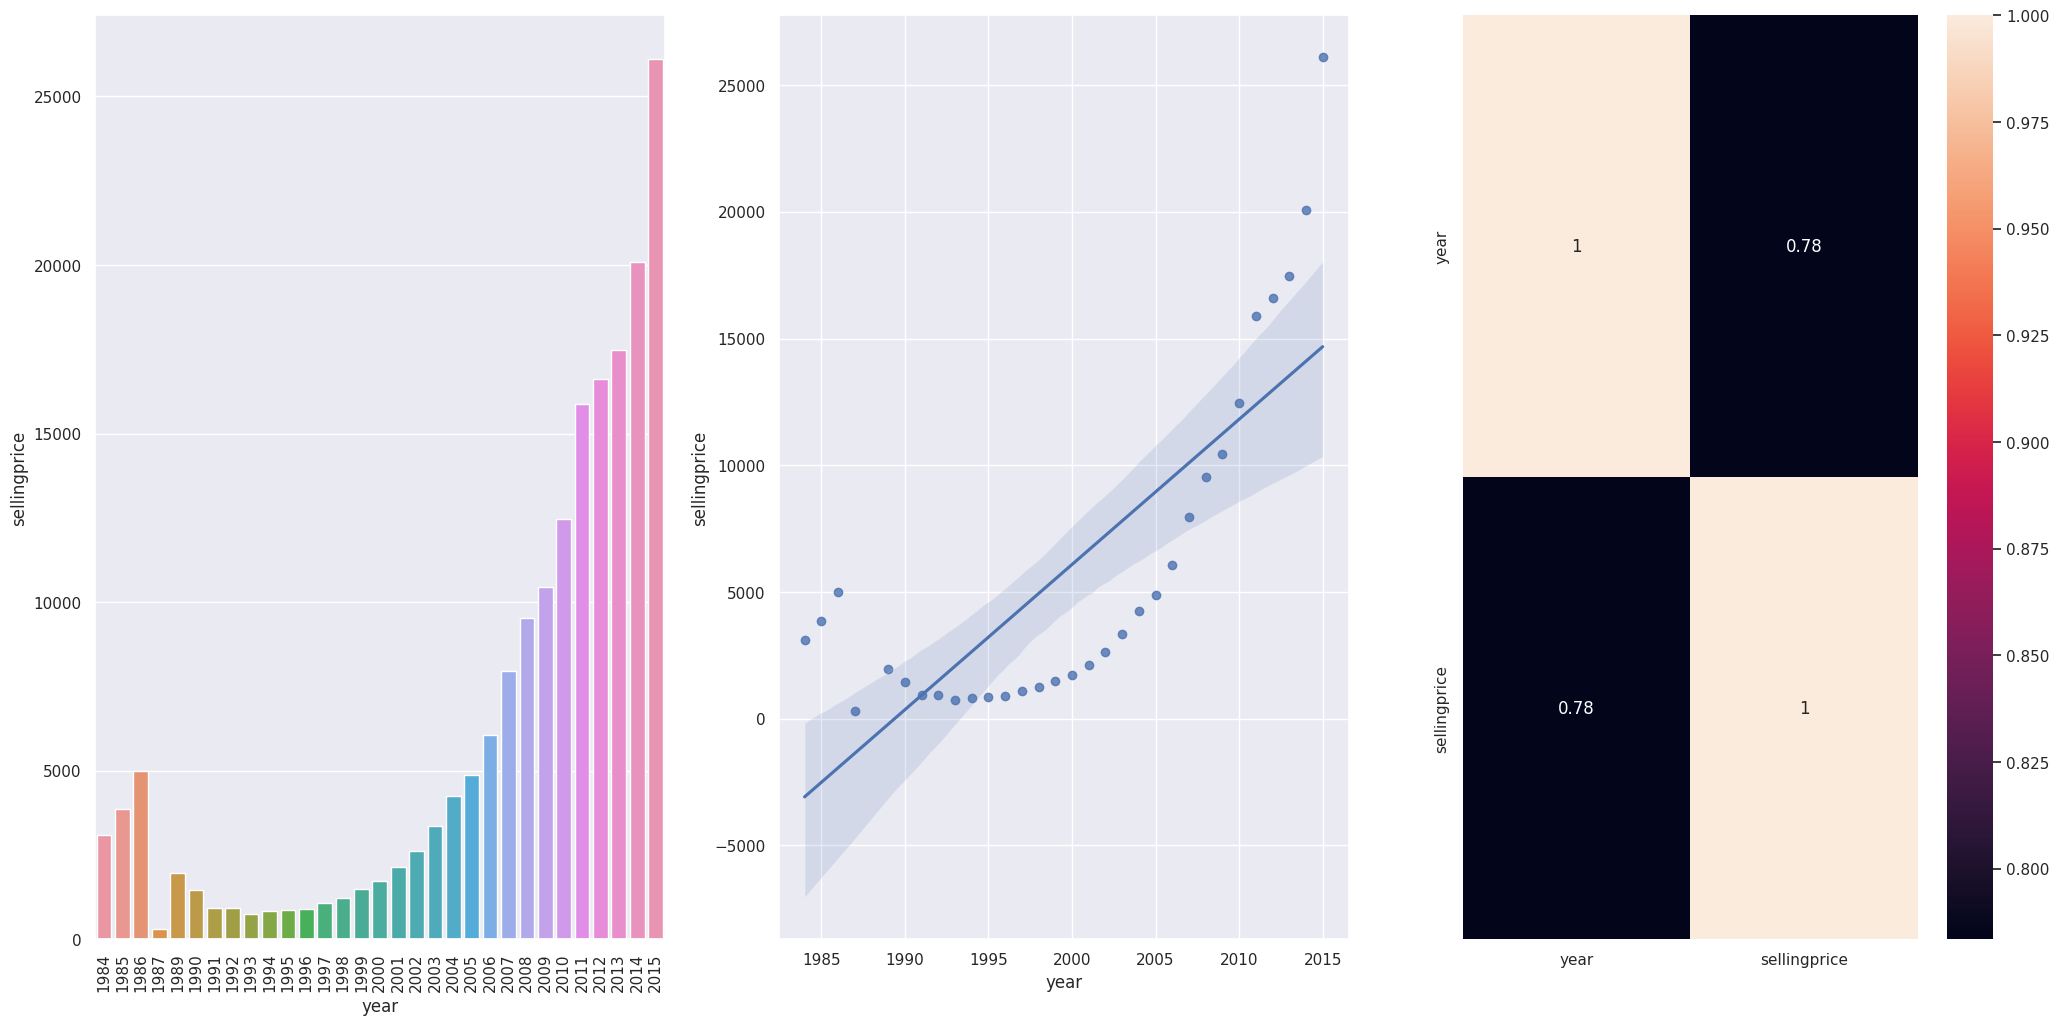

In [33]:
aux = df2[['year', 'sellingprice']].groupby('year').mean().reset_index()

plt.subplot(1,3,1)
sns.barplot(data=aux, x='year', y='sellingprice');
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.regplot(data=aux, x='year', y='sellingprice');

plt.subplot(1,3,3)
sns.heatmap(aux.corr(method='pearson'), annot=True);

### 2.  Veículos de montadoras não-americanas são vendidos por preços em média 10% inferiores.

_Falso_: Carros de Montadoras americanas possuem valor média muito próxima a de carros estrangeiros (alteração percentual pouco significativa)

**NOTA**: Há a presença de marcas de luxo na database, o que faz com que a montadora tenha sim forte influência na variável alvo

In [34]:
df2['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'ford t

In [35]:
list_usa = ['Chevrolet', 'Ford', 'Buick', 'Cadillac', 'Acura', 'Lexus',
            'Infiniti', 'Lincoln', 'lincoln', 'Dodge', 'Chrysler', 'ford',
            'GMC',  'Ram', 'chevrolet', 'pontiac', 'Pontiac', 'Saturn',
            'Mercury', 'HUMMER', 'cadillac',  'lexus', 'gmc truck',
            'dodge', 'dodge tk', 'Geo', 'acura', 'gmc', 'mercury',
            'buick',  'chev truck', 'ford tk', 'plymouth', 'Plymouth',
            'ford truck', 'Tesla', 'airstream', 'dot',]

aux_df2 = df2.copy()
aux_df2['make_usa'] = aux_df2.apply(lambda x: 'USA' if x['make'] in list_usa
                                                    else 'Other Countries', axis=1)

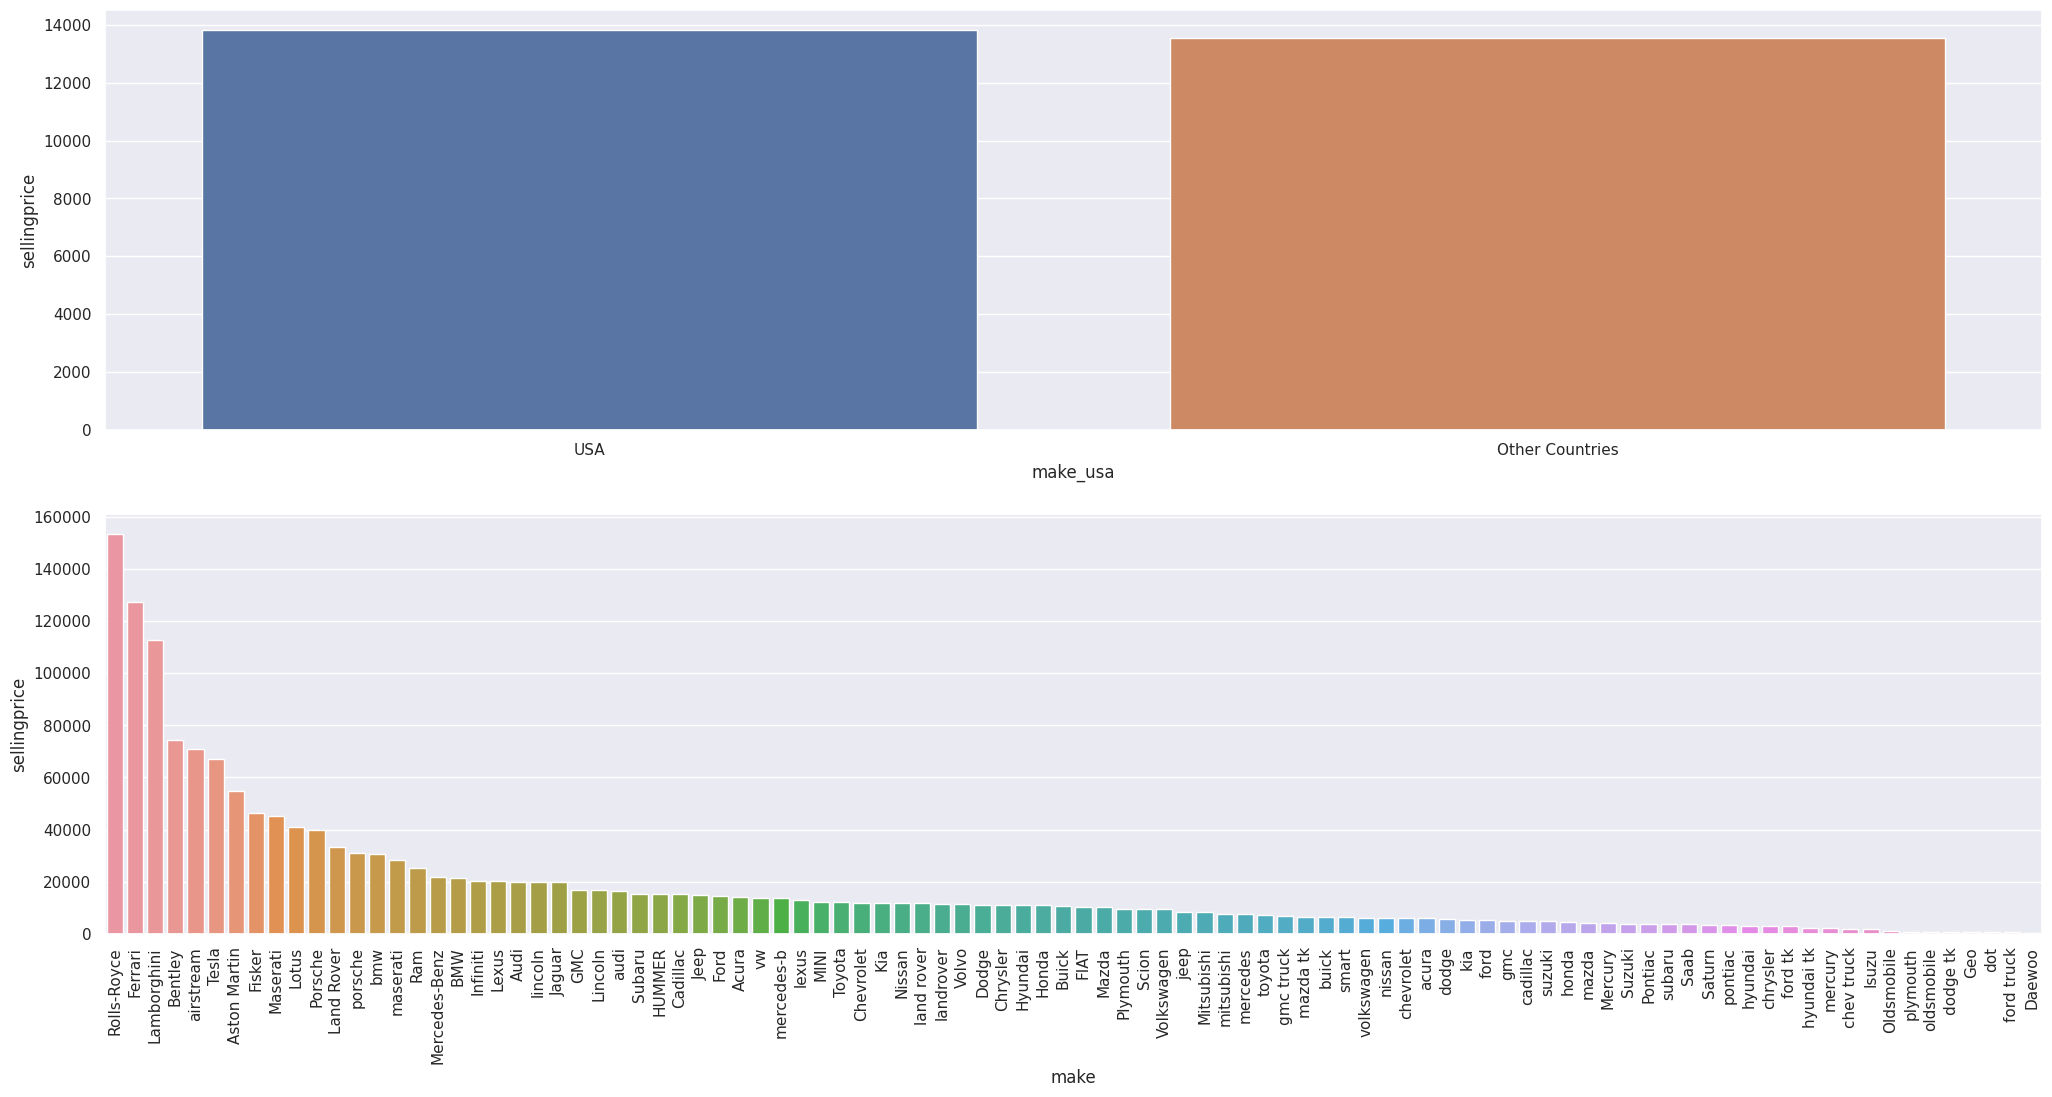

In [36]:
aux = aux_df2[['make_usa', 'sellingprice']].groupby('make_usa').mean().reset_index().sort_values('sellingprice', ascending=False)
aux2 = aux_df2[['make', 'sellingprice']].groupby('make').mean().reset_index().sort_values('sellingprice', ascending=False)

plt.subplot(2,1,1)
sns.barplot(data=aux, x='make_usa', y='sellingprice');

plt.subplot(2,1,2)
sns.barplot(data=aux2, x='make', y='sellingprice');
plt.xticks(rotation=90);

### 3.  Veículos maiores (feature 'body') são vendidos por preços em média 15% superiores aos demais.

_Falso_: Há uma grande quantidade de classes de veículos conversíveis e de duas portas(coupe) cujos preços médios são maiores que a média.

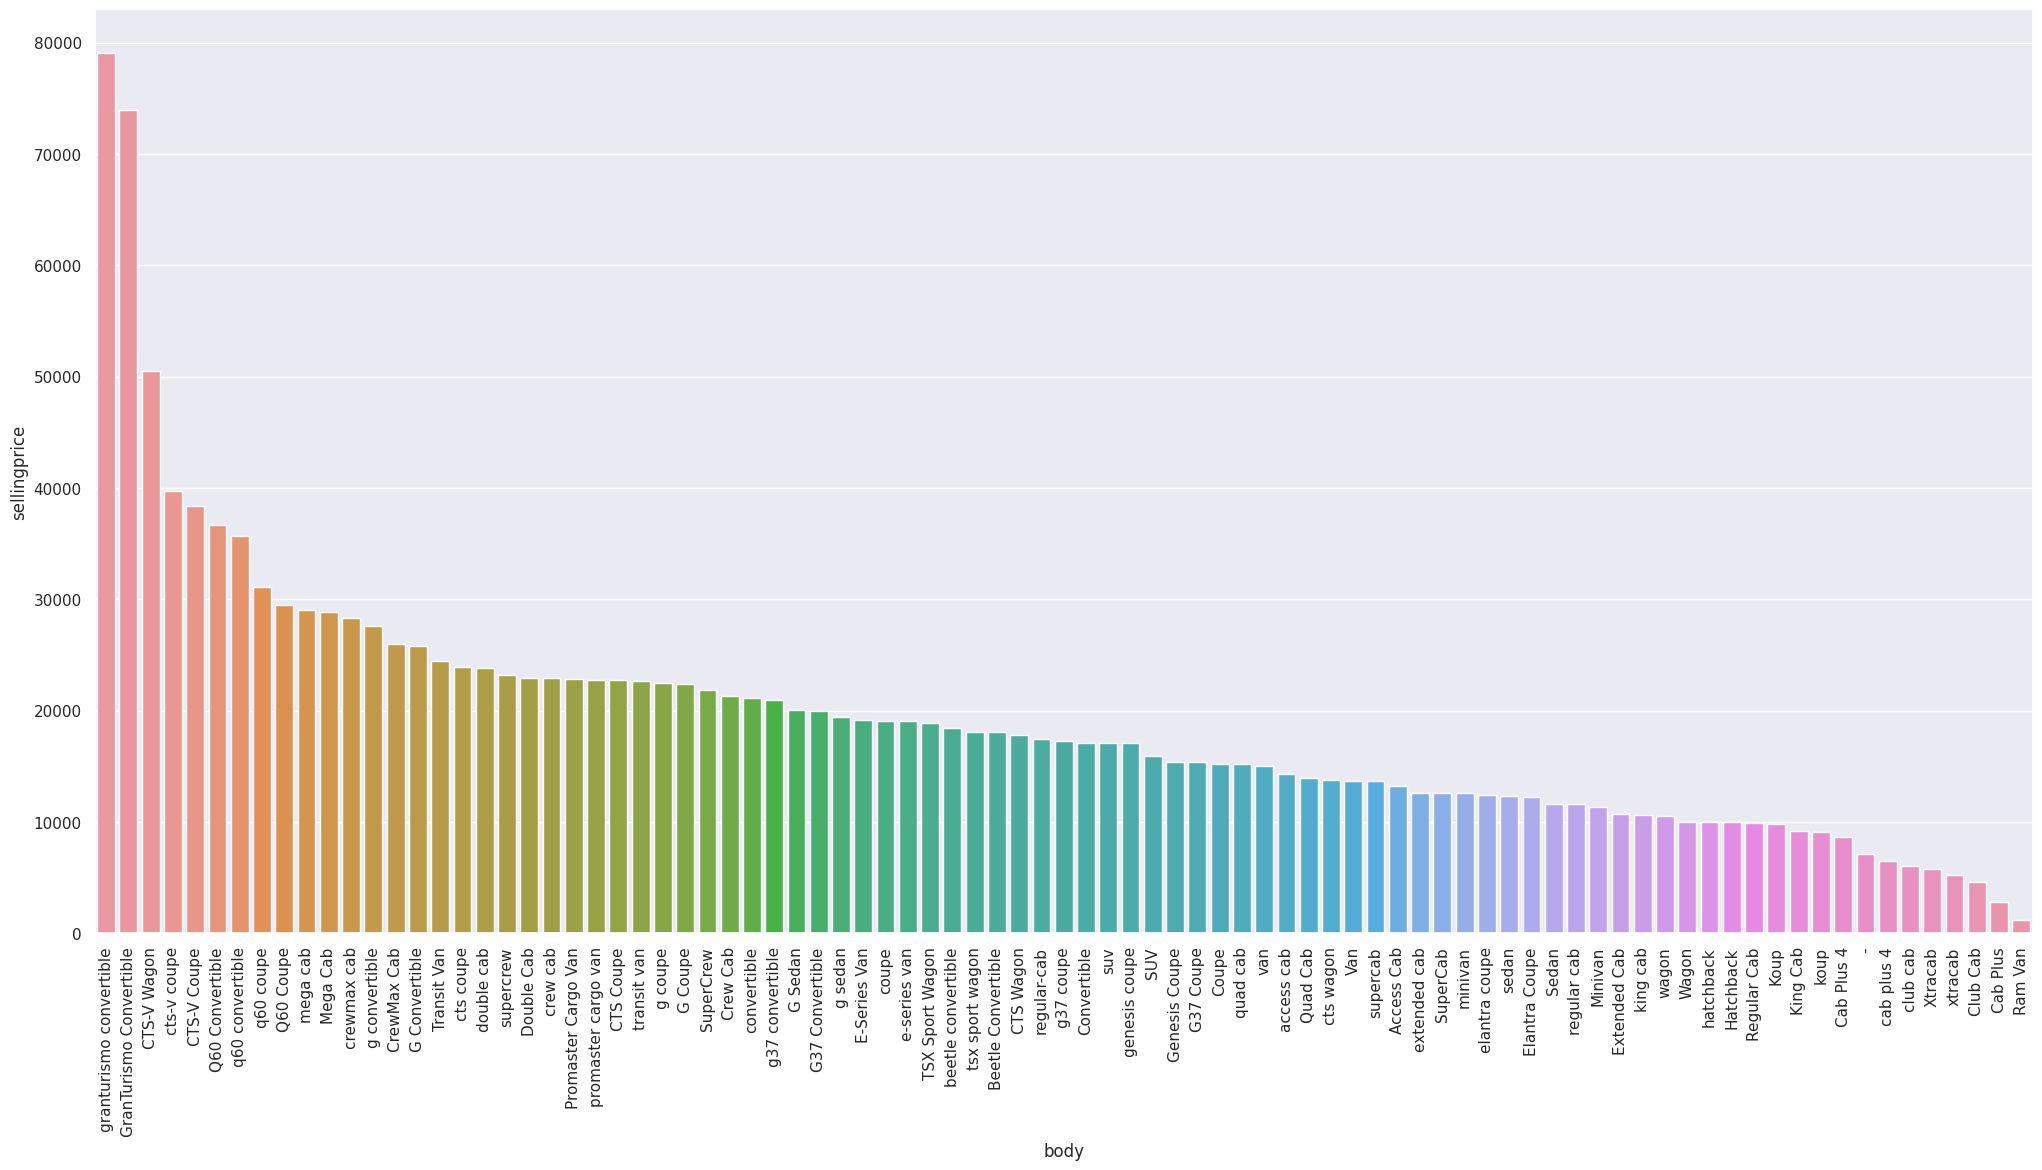

In [37]:
aux = df2[['body', 'sellingprice']].groupby('body').mean().reset_index().sort_values('sellingprice', ascending=False)

sns.barplot(data=aux, x='body', y='sellingprice');
plt.xticks(rotation=90);

### 4. Veículos com câmbio automatico são vendidos por preços em média 15% superiores.

_Verdadeiro_: Veículos com câmbio automático são possuem valor em média até 25% maiores em comparação à veículos com câmbio manual.

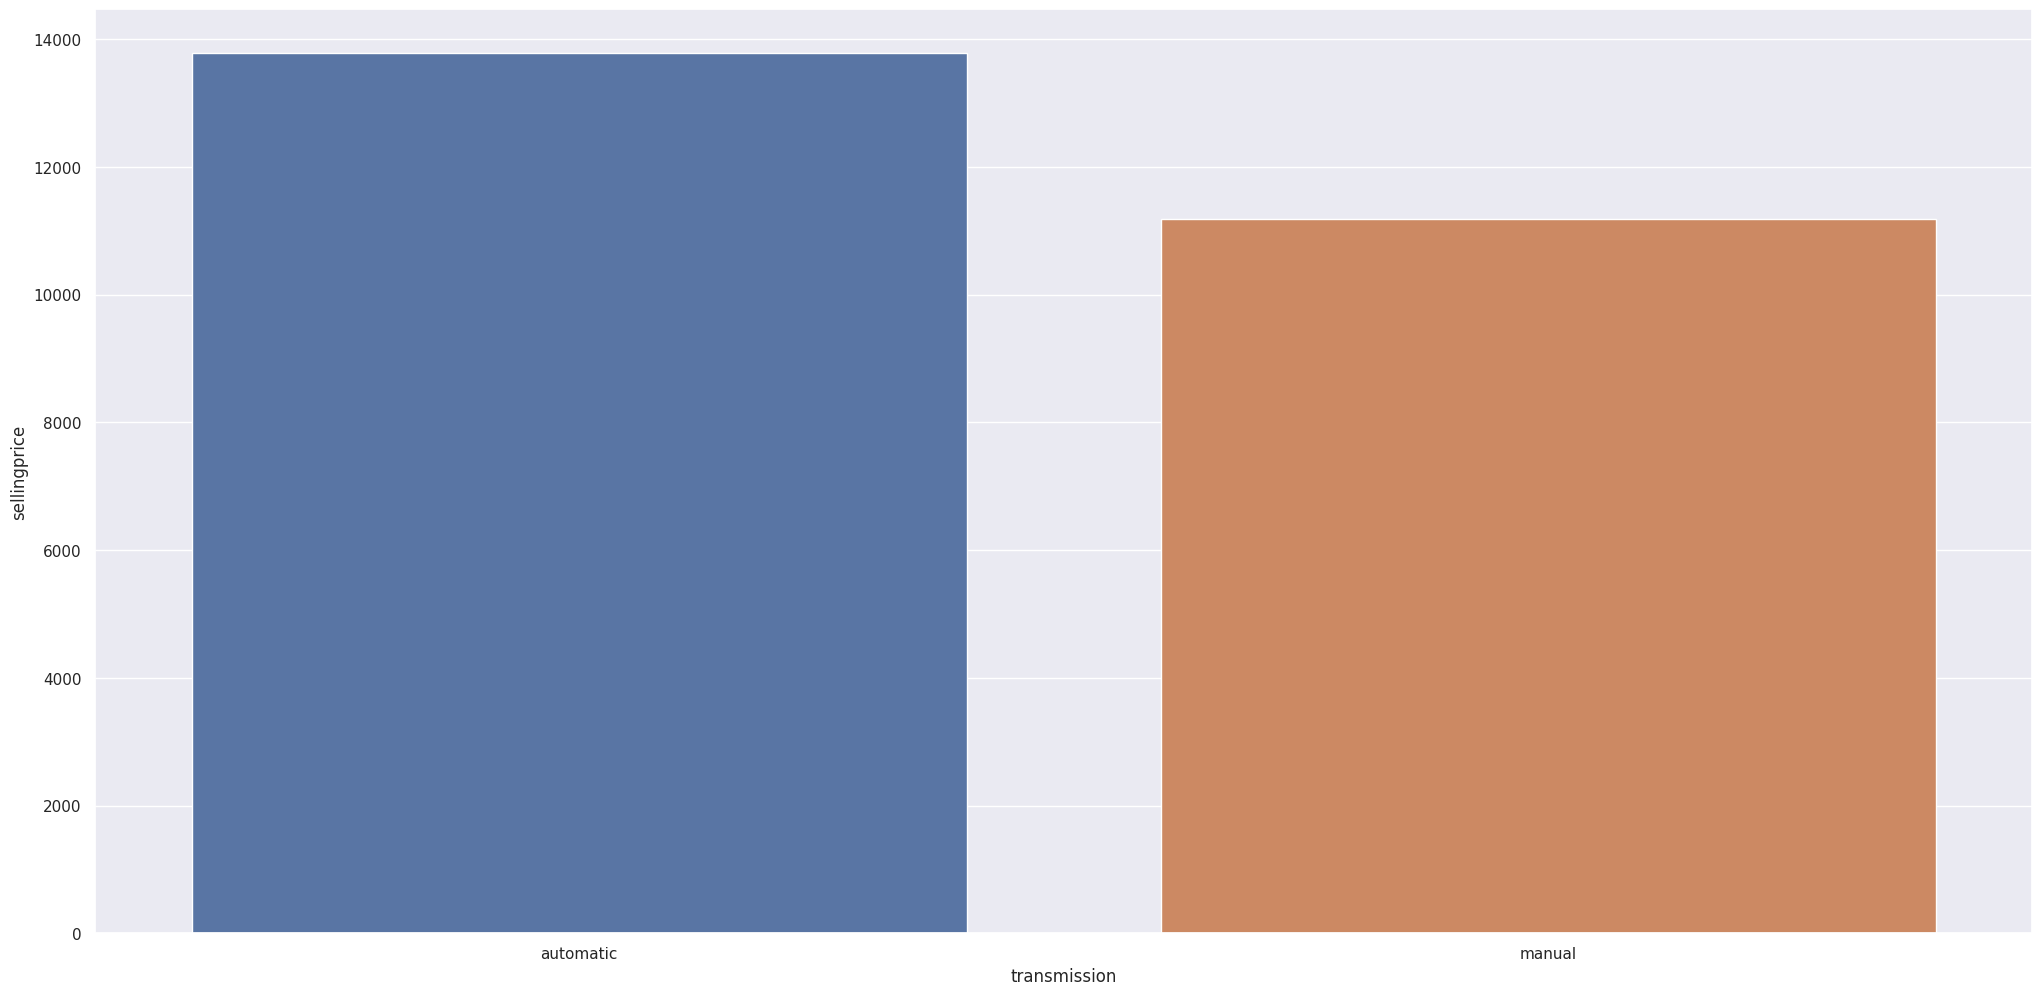

In [38]:
aux = df2[['transmission', 'sellingprice']].groupby('transmission').mean().reset_index().sort_values('sellingprice', ascending=False)

sns.barplot(data=aux, x='transmission', y='sellingprice');

In [39]:
aux.head()

transmission  sellingprice
0    automatic  13779.127879
1       manual  11179.788737

### 5.  Veículos com odômetro indicando marca superior a 68.000 milhas são vendidos por preços até 30% mais baratos em média.

_Verdadeiro_: Há uma correlação muito forte entre a marca indicada no odometro e o preço de venda

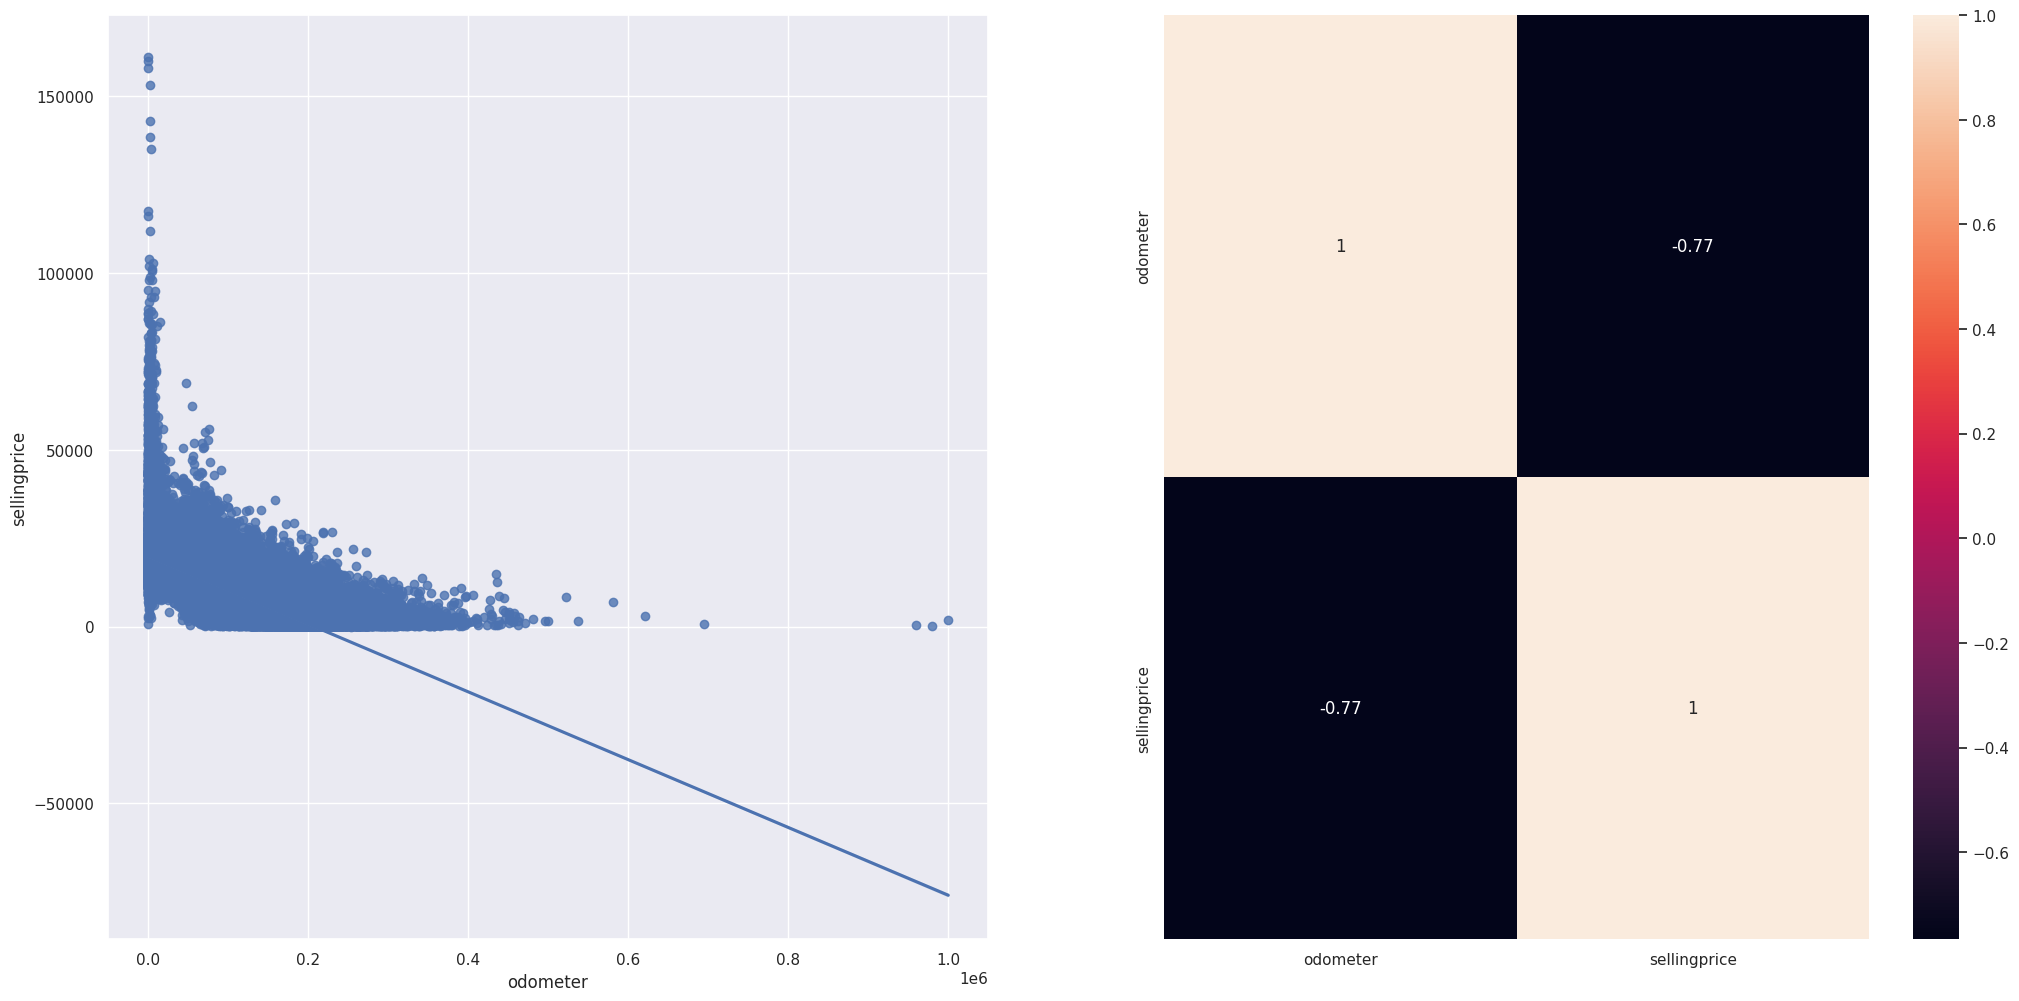

In [40]:
aux = df2[['odometer', 'sellingprice']].groupby('odometer').mean().reset_index()

plt.subplot(1,2,1)
sns.regplot(data=aux, x='odometer', y='sellingprice');

plt.subplot(1,2,2)
sns.heatmap(aux.corr(method='pearson'), annot=True);

### 6.  O Montante do valor em vendas é até 30% superior no segundo semestre (Meses de 6 a 12)


Falso -> Há uma disparidade muito grande entre o montante de vendas superior do primeiro semestre em comparação ao segundo.

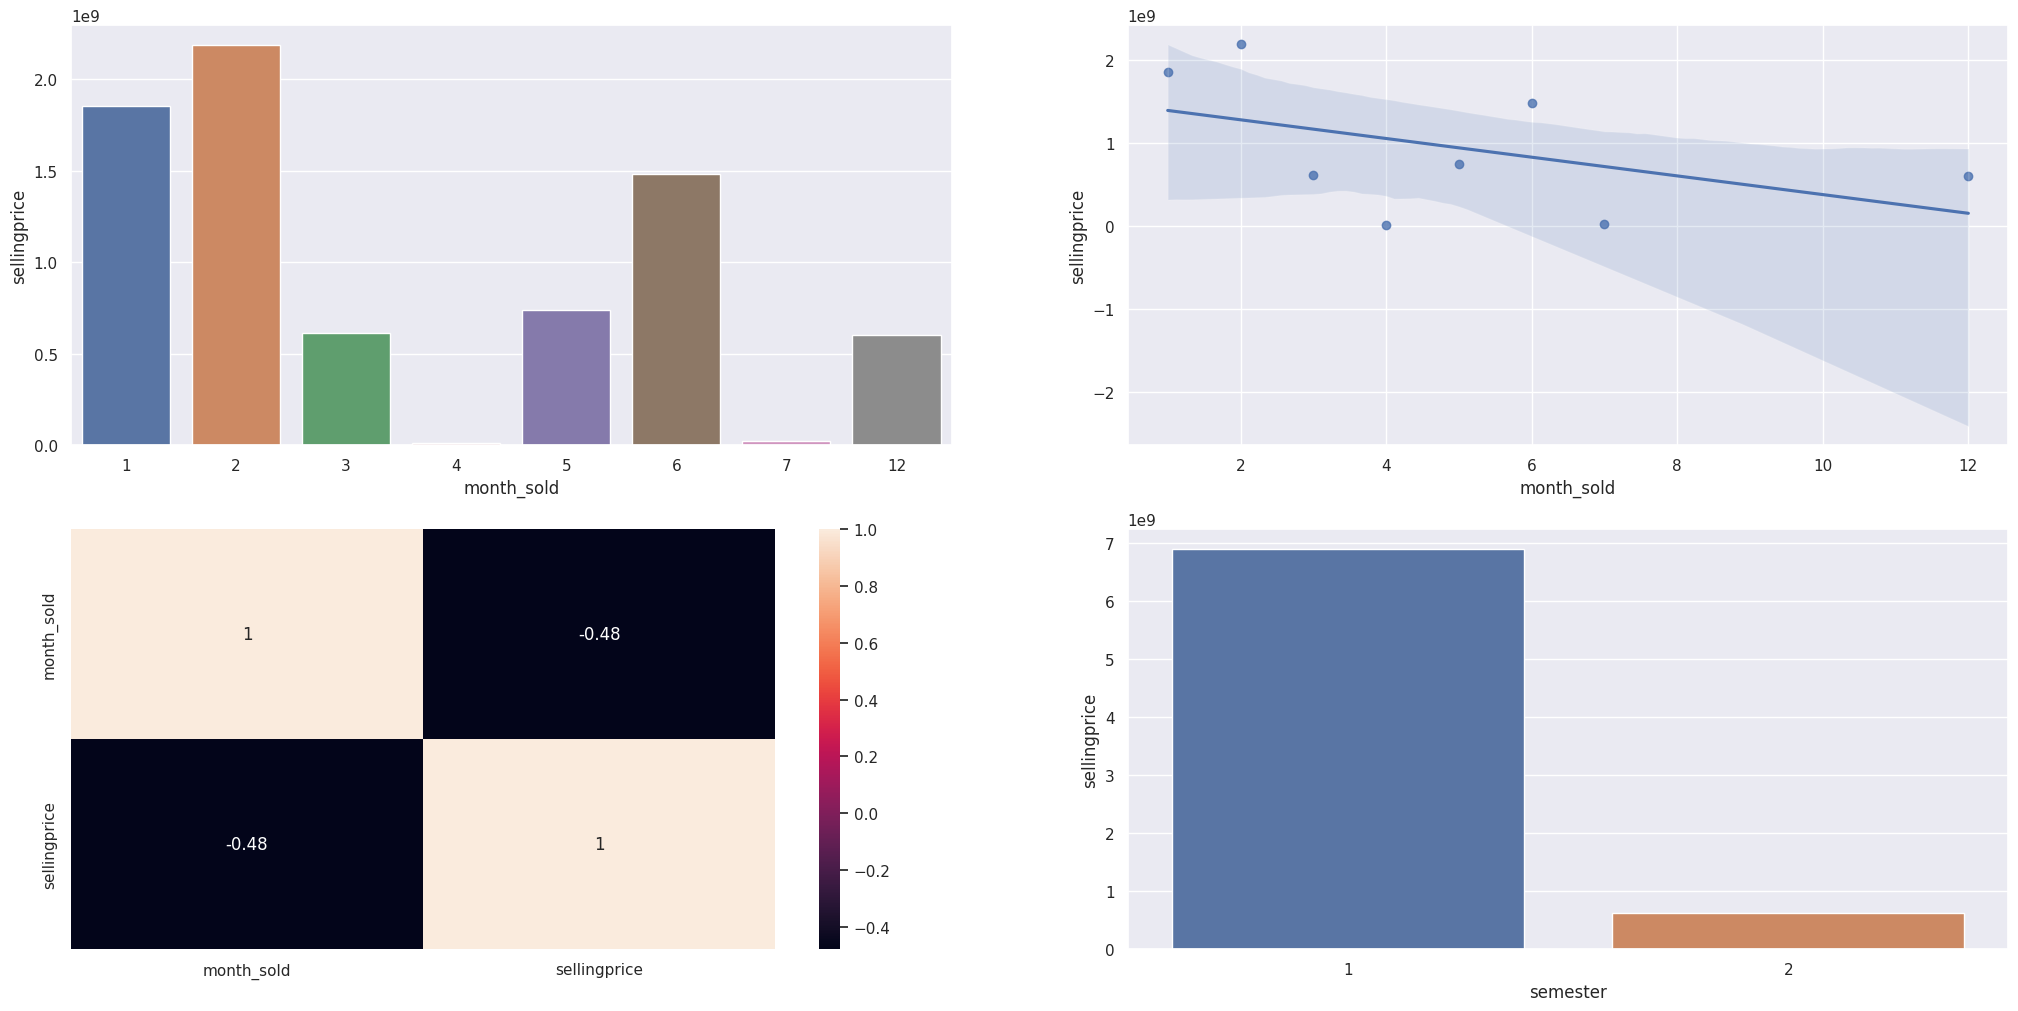

In [41]:
aux2 = df2[['month_sold', 'sellingprice']].groupby('month_sold').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(data=aux2, x='month_sold', y='sellingprice');

plt.subplot(2,2,2)
sns.regplot(data=aux2, x='month_sold', y='sellingprice');

plt.subplot(2,2,3)
sns.heatmap(aux2.corr(method='pearson'), annot=True);

plt.subplot(2,2,4)
aux2['semester'] = aux2['month_sold'].apply(lambda x: '1' if x <= 6 else '2')
aux2 = aux2[['semester', 'sellingprice']].groupby('semester').sum().reset_index()
sns.barplot(data=aux2, x='semester', y='sellingprice');

### 7.  O Montante do valor em vendas é até 10% superior após o dia 15 dias dos meses.

_Verdadeiro_: Os últimos 15 dias do mes apresentam um montante até 10% maior que nos 15 primeiros dias para o total vendido.

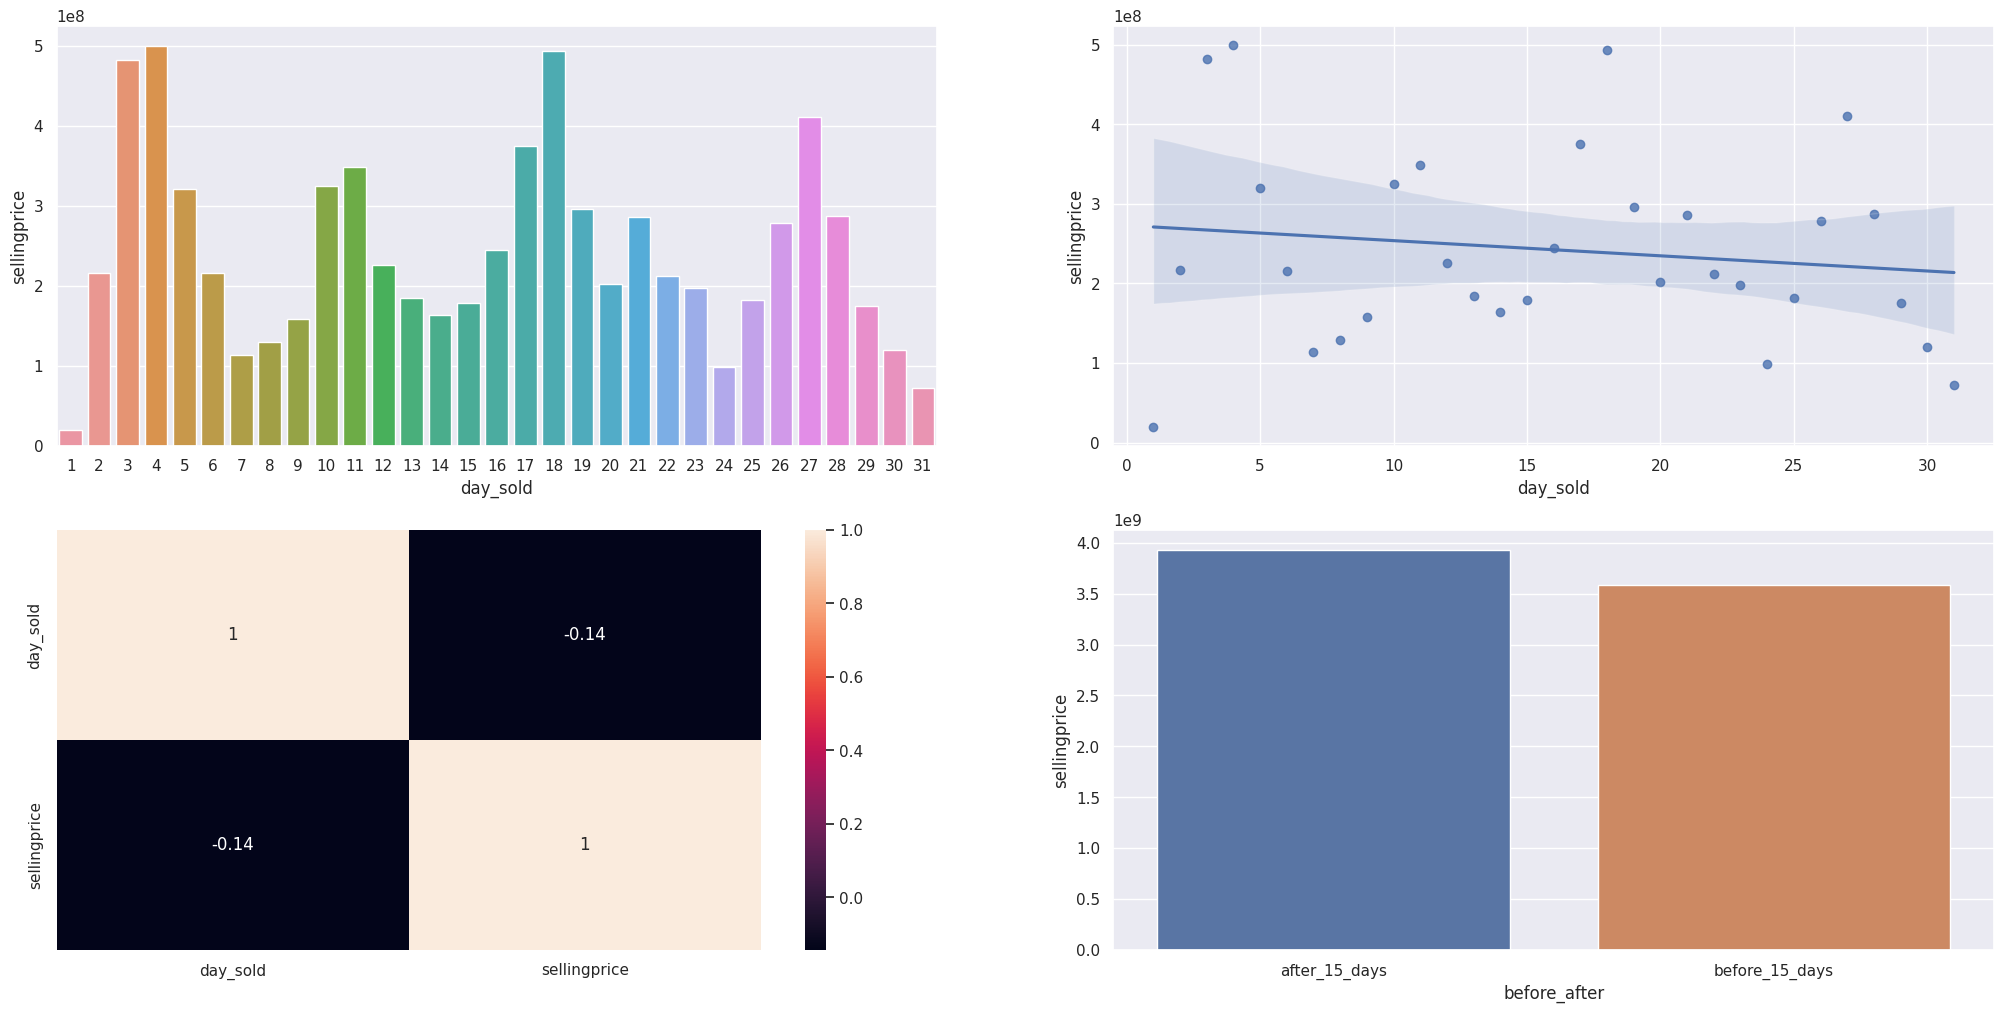

In [42]:
aux2 = df2[['day_sold', 'sellingprice']].groupby('day_sold').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(data=aux2, x='day_sold', y='sellingprice');

plt.subplot(2,2,2)
sns.regplot(data=aux2, x='day_sold', y='sellingprice');

plt.subplot(2,2,3)
sns.heatmap(aux2.corr(method='pearson'), annot=True);

plt.subplot(2,2,4)
aux2['before_after'] = aux2['day_sold'].apply(lambda x: 'before_15_days' if x <= 15 else 'after_15_days')
aux2 = aux2[['before_after', 'sellingprice']].groupby('before_after').sum().reset_index()
sns.barplot(data=aux2, x='before_after', y='sellingprice');

## 8. O Montante do valor em vendas é em média até 20% superior aos finais de semana

_Falso_: As vendas são considerávelmente maiores no meio da semana

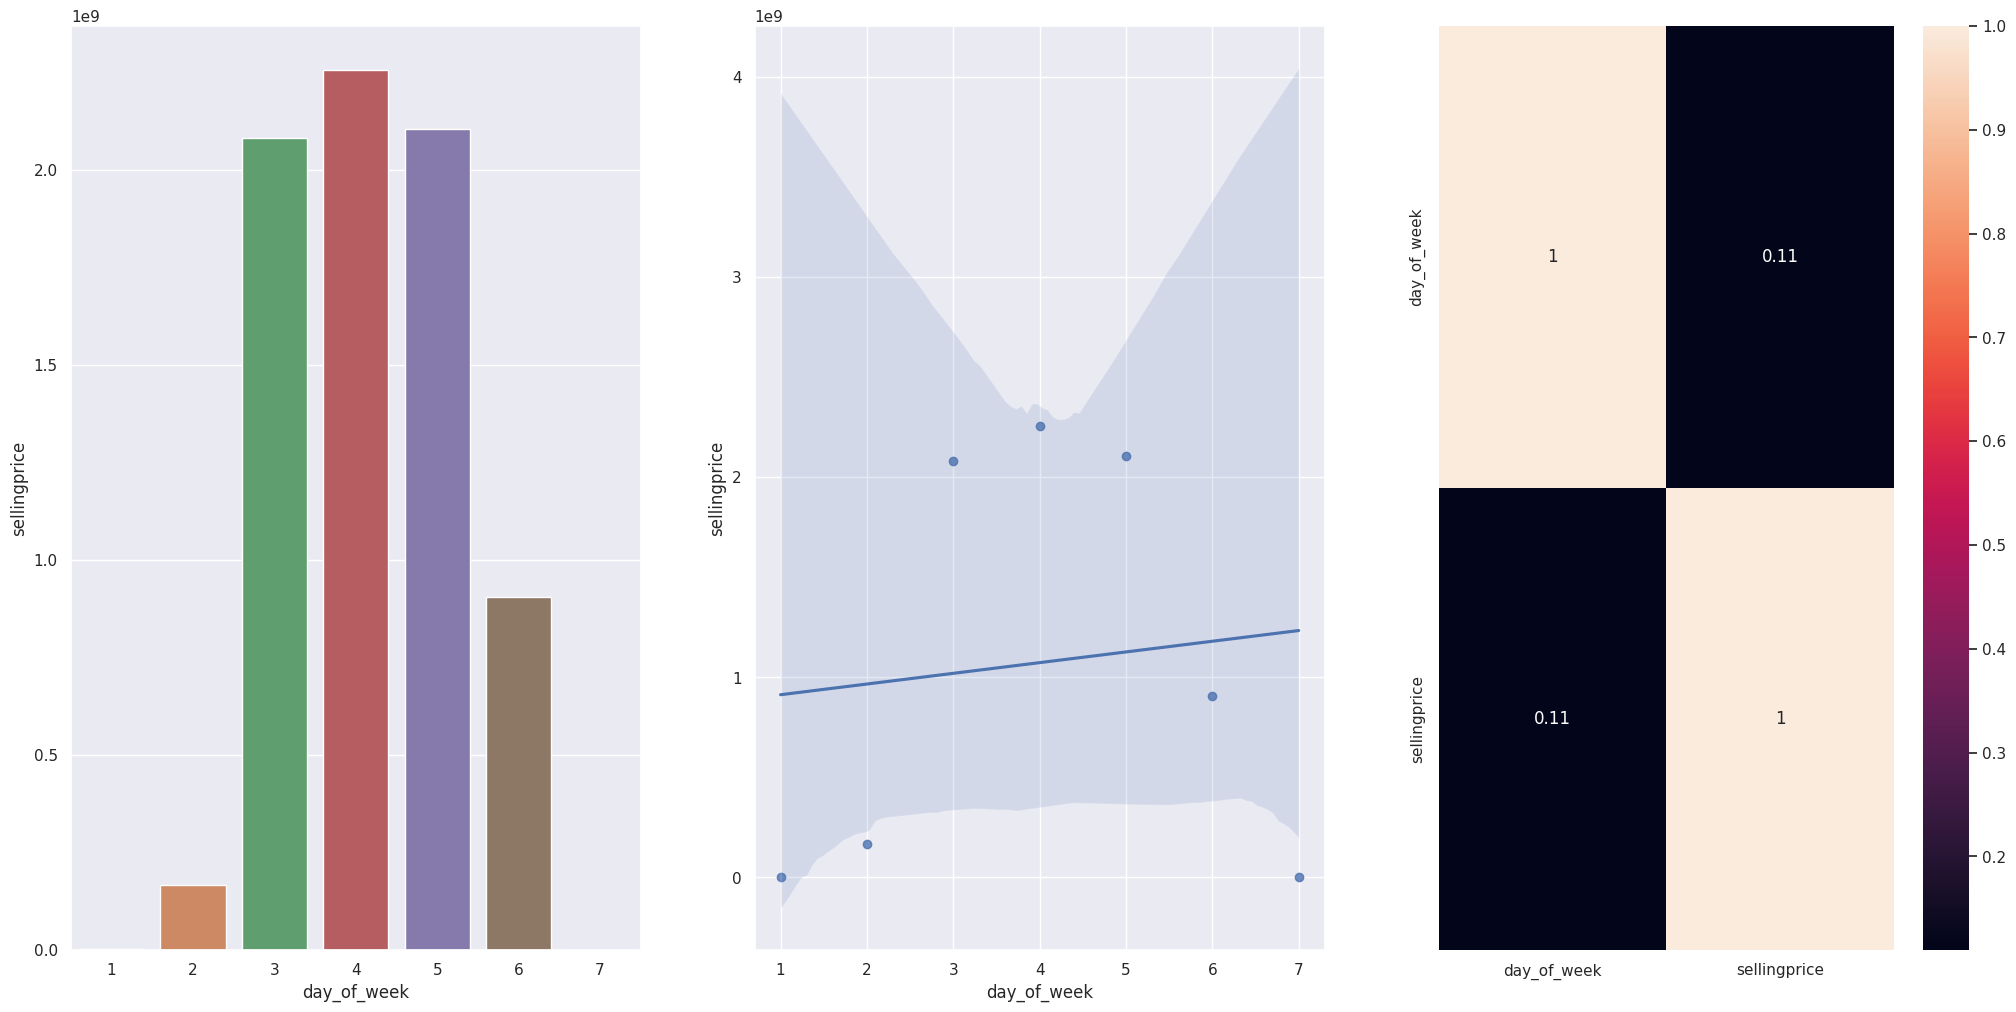

In [55]:
aux2 = df2.copy()
aux2['day_of_week'] = aux2['day_of_week'].apply(lambda x: 1 if x == 'Sun' else
                                                          2 if x == 'Mon' else
                                                          3 if x == 'Tue' else
                                                          4 if x == 'Wed' else
                                                          5 if x == 'Thu' else
                                                          6 if x == 'Fri' else
                                                          7)
aux2 = aux2[['day_of_week', 'sellingprice']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(data=aux2, x='day_of_week', y='sellingprice');

plt.subplot(1,3,2)
sns.regplot(data=aux2, x='day_of_week', y='sellingprice');

plt.subplot(1,3,3)
sns.heatmap(aux2.corr(method='pearson'), annot=True);

Dessa forma, a EDA nos indica que as seguintes variáveis tem impacto relevante na alteração do preço de venda:

1.  year
2.  make
3.  body
4.  Transmission
5.  odometer
6.  month_sold
7.  day_of_week

# 3.0 SELEÇÃO DE FEATURES

In [56]:
df3 = df2.copy()

##  3.1 Separação treino-teste

In [57]:
X_split = df3.drop(['vin', 'sellingprice'], axis = 1)
y_split = df3['sellingprice'].copy()

X_train, X_validation, y_train, y_validation = train_test_split(X_split, y_split, test_size=0.2, random_state = 32)

df3 = pd.concat([X_train, y_train], axis=1)
df3 = df3.reset_index(drop=True)

## 3.2 Feature Selection(Boruta)

# 4.0 MODELAGEM

# 5.0 VALIDAÇÃO DE RESULTADOS

# 5.0 MODEL IMPLEMENTATION